#Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:




*  Visualize the Time Series Data

*  Make the time series data stationary

*  Plot the Correlation and AutoCorrelation Charts

*  Construct the ARIMA Model or Seasonal ARIMA based on the data

*  Use the model to make predictions












In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


#Step 2: Visualize the Data

<Axes: xlabel='Month'>

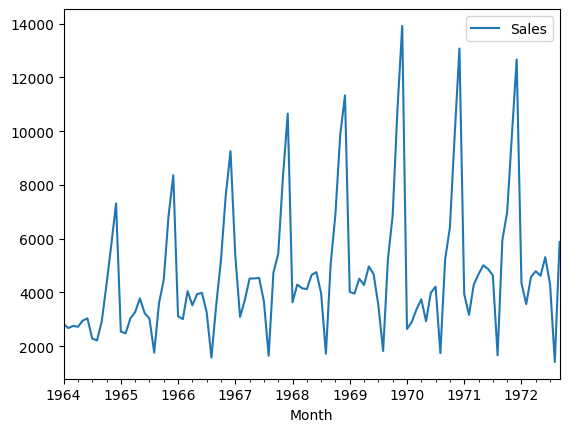

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)


In [ ]:
df.head(14)


,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

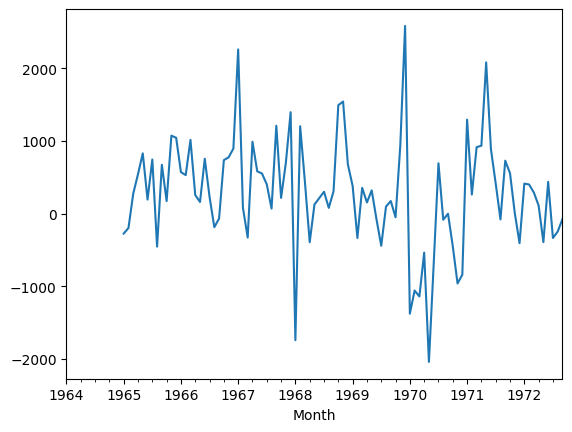

In [ ]:

df['Seasonal First Difference'].plot()

#Auto Regressive Model

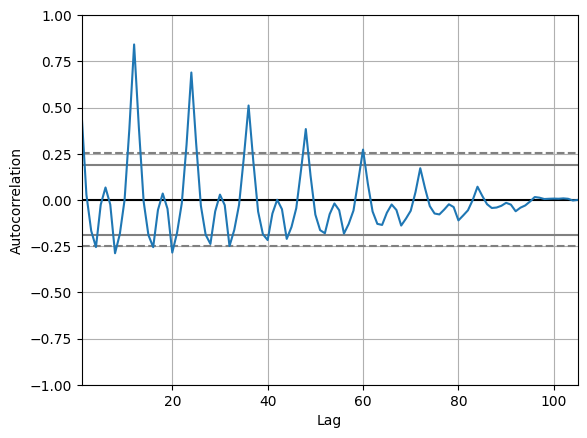

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Instead of:
# from pandas.tools.plotting import autocorrelation_plot

# Use:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


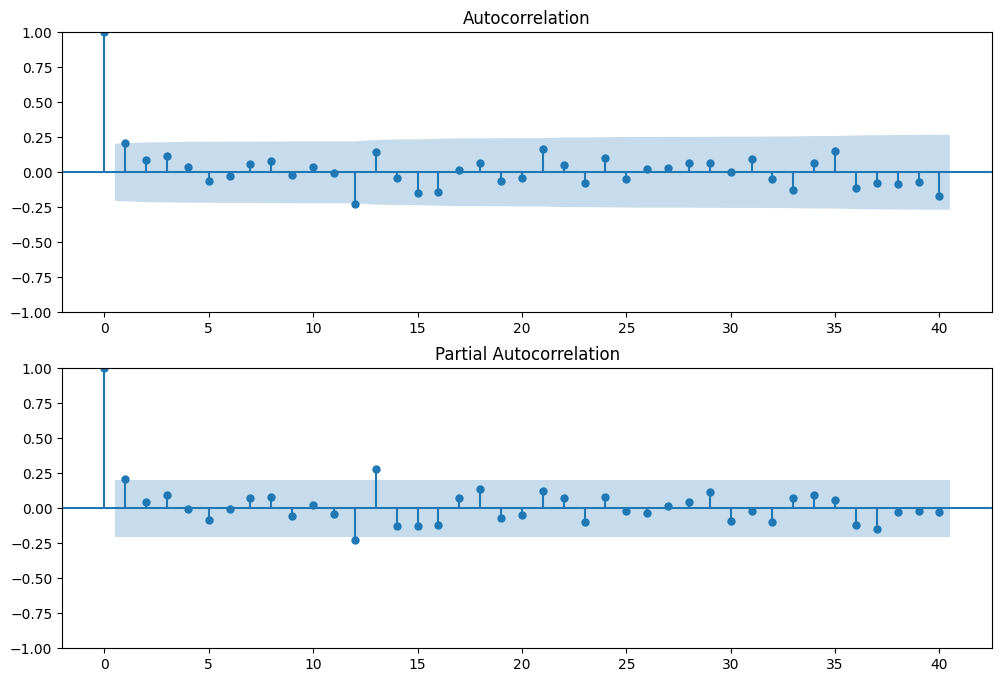

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm # Import statsmodels with alias sm


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) # Now 'sm' is defined
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2) # Now 'sm' is defined

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Instead of:
# from statsmodels.tsa.arima_model import ARIMA

# Use:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 03 Dec 2024   AIC                           1911.627
Time:                        18:47:33   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

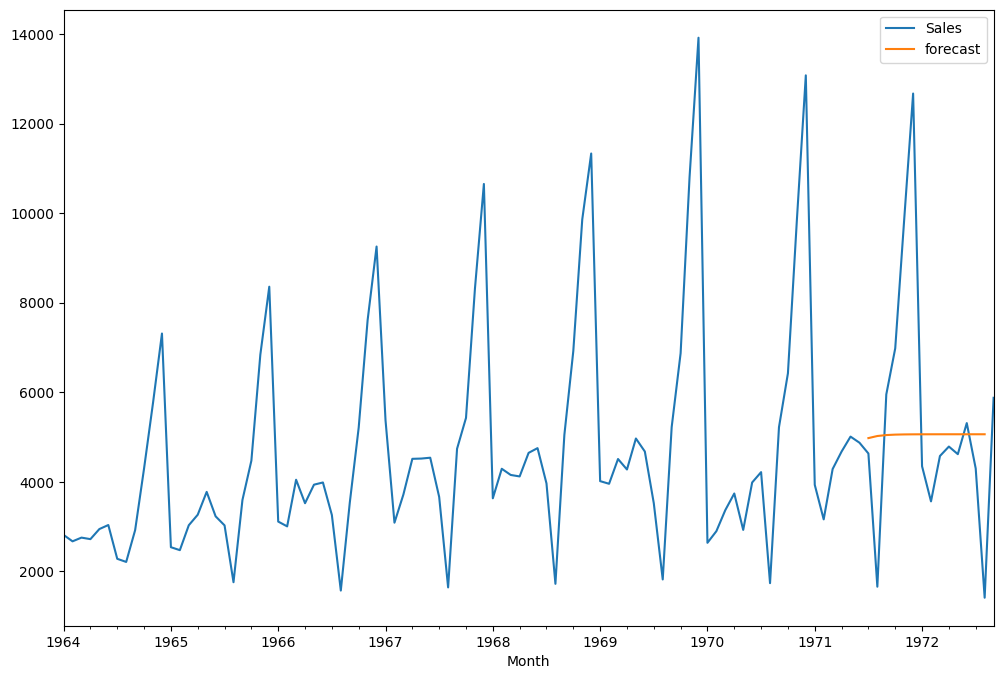

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

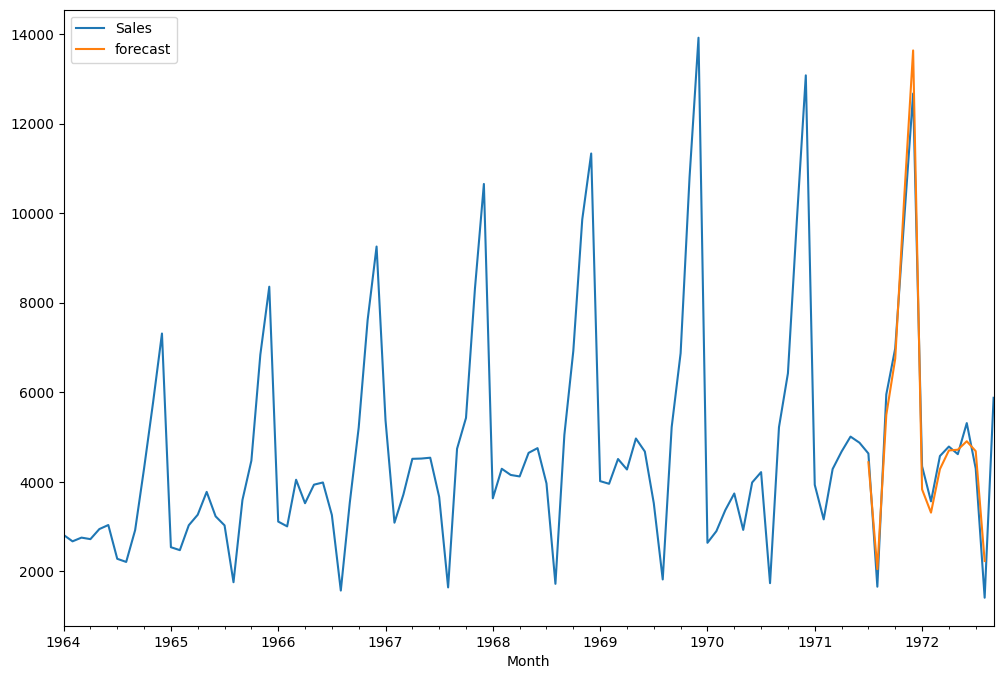

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

<ipython-input-43-4cc8c9eff41a>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

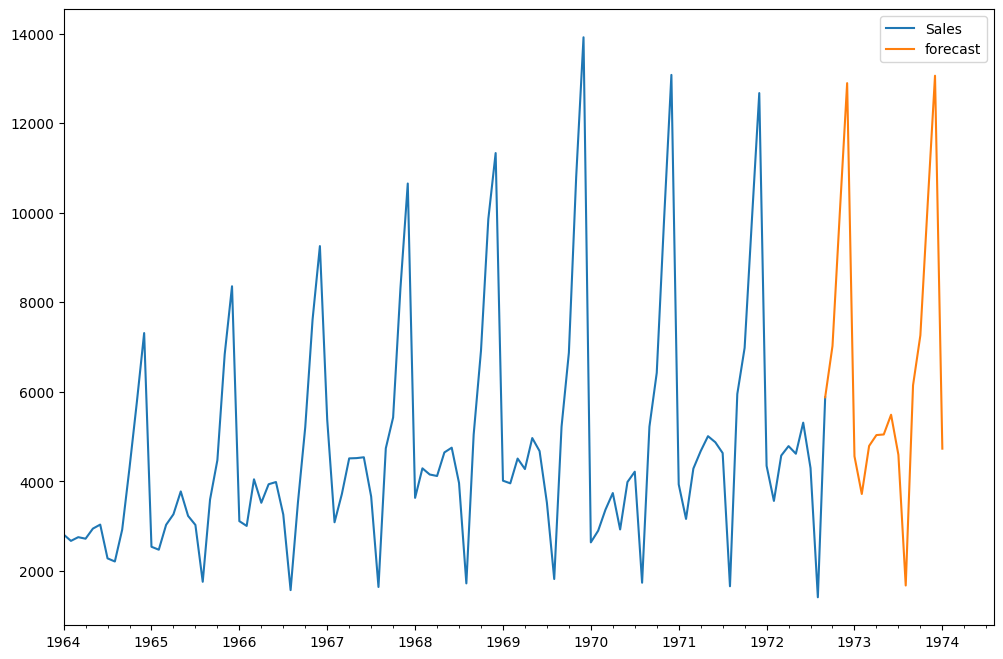

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

#Holt-Winters Exponential Smoothing method

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


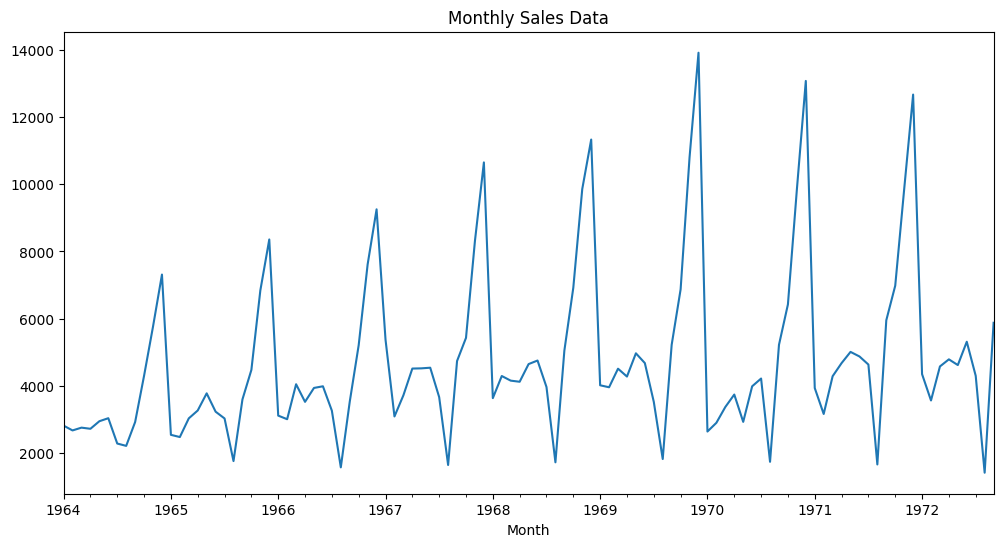

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


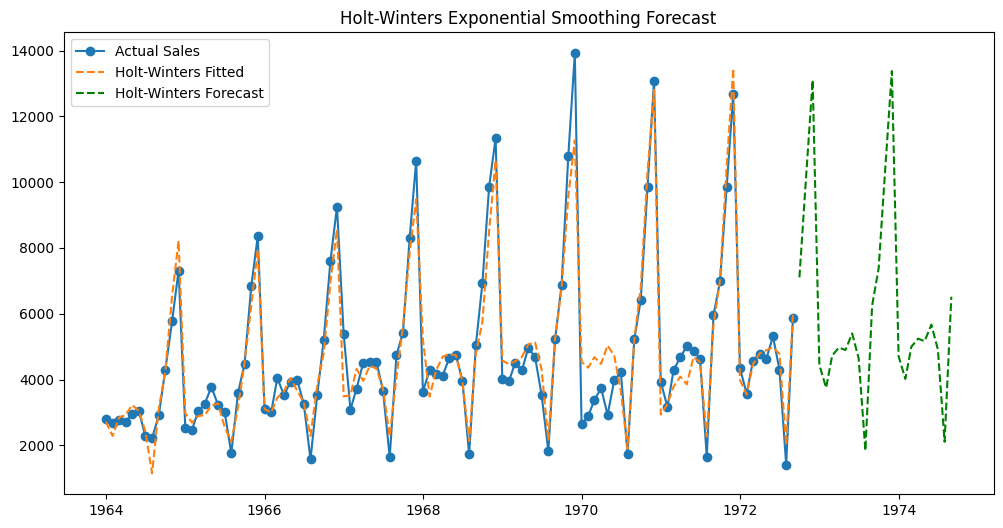

             Sales    HW_Fitted   HW_Forecast
1972-04-01  4788.0  4797.231292           NaN
1972-05-01  4618.0  4887.830249           NaN
1972-06-01  5312.0  4979.499683           NaN
1972-07-01  4298.0  4780.632566           NaN
1972-08-01  1413.0  2011.191411           NaN
1972-09-01  5877.0  5987.890553           NaN
1972-10-01     NaN          NaN   7104.789083
1972-11-01     NaN          NaN  10188.540643
1972-12-01     NaN          NaN  13105.969533
1973-01-01     NaN          NaN   4439.864098
1973-02-01     NaN          NaN   3749.748503
1973-03-01     NaN          NaN   4729.417144
1973-04-01     NaN          NaN   4974.077584
1973-05-01     NaN          NaN   4895.875914
1973-06-01     NaN          NaN   5399.740168
1973-07-01     NaN          NaN   4645.506971
1973-08-01     NaN          NaN   1837.482249
1973-09-01     NaN          NaN   6248.577947
1973-10-01     NaN          NaN   7373.881298
1973-11-01     NaN          NaN  10457.632858
1973-12-01     NaN          NaN  1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.tseries.offsets import DateOffset

# Load and clean the dataset
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.columns = ["Month", "Sales"]
df.drop([105, 106], axis=0, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot the original data
df['Sales'].plot(title="Monthly Sales Data", figsize=(12, 6))
plt.show()

# Apply Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(
    df['Sales'],
    trend='add',            # Additive trend
    seasonal='add',         # Additive seasonality
    seasonal_periods=12     # Monthly seasonality
)

# Fit the model
hw_results = hw_model.fit()

# Add fitted values to the dataframe
df['HW_Fitted'] = hw_results.fittedvalues

# Forecast future sales
forecast_steps = 24  # Number of months to forecast
future_hw_forecast = hw_results.forecast(steps=forecast_steps)

# Generate future dates
future_dates_hw = [df.index[-1] + DateOffset(months=x) for x in range(1, forecast_steps + 1)]
future_hw_df = pd.DataFrame(index=future_dates_hw, columns=["HW_Forecast"])
future_hw_df["HW_Forecast"] = future_hw_forecast

# Combine historical data with forecast
combined_hw_df = pd.concat([df, future_hw_df])

# Plot the fitted values and forecasts
plt.figure(figsize=(12, 6))
plt.plot(combined_hw_df.index, combined_hw_df['Sales'], label="Actual Sales", marker='o')
plt.plot(combined_hw_df.index, combined_hw_df['HW_Fitted'], label="Holt-Winters Fitted", linestyle='--')
plt.plot(combined_hw_df.index, combined_hw_df['HW_Forecast'], label="Holt-Winters Forecast", linestyle='--', color='green')
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.legend()
plt.show()

# Display combined dataframe for reference
print(combined_hw_df.tail(30))
